In [491]:
import pandas as pd
import numpy as np

path_companies = "companies.txt"
path_rounds2 = "rounds2.csv"
path_mapping = "mapping.csv"
companies = pd.read_csv(path_companies, sep="\t", encoding= 'ISO-8859-1')
rounds2 = pd.read_csv(path_rounds2, encoding= 'ISO-8859-1')
sector_mapping = pd.read_csv(path_mapping, encoding= 'ISO-8859-1')

In [492]:
import matplotlib.pyplot as plt

In [493]:
# Changing all the null values to NA and convering the dataframe to lowercase
rounds2 = rounds2.fillna('NA').astype(str).apply(lambda x: x.str.lower())
companies = companies.fillna('NA').astype(str).apply(lambda x: x.str.lower())

In [494]:
# Checking for Unique values in rounds2 and companies DataFrames

unique_company_rounds = rounds2['company_permalink'].unique().tolist()
print(len(unique_company_rounds))
#rounds2.info()
print()
unique_company_companies = companies['permalink'].unique().tolist()
print(len(unique_company_companies))
#companies.info()

66370
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         114949 non-null object
funded_at                  114949 non-null object
raised_amount_usd          114949 non-null object
dtypes: object(6)
memory usage: 5.3+ MB

6817
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 10 columns):
permalink        6817 non-null object
name             6817 non-null object
homepage_url     6817 non-null object
category_list    6817 non-null object
status           6817 non-null object
country_code     6817 non-null object
state_code       6817 non-null object
region           6817 non-null object
city             6817 non-null object
founded_at       6817 non-null object
dtypes: object(10)
memory usage: 532.7+ KB


In [495]:
# Checking if companies in the rounds2 file are present in companies or not

companyListCompanies = companies.permalink.unique().tolist()
companyListRounds2 = rounds2.company_permalink.unique().tolist()

set(companyListCompanies) <= set(companyListRounds2)

print(len(set(companyListCompanies) - set(companyListRounds2)))

9


In [496]:
# Replace all the empty strings with null
rounds2 = rounds2.replace([''], np.nan)

In [497]:
# Drop the columns
rounds2 = rounds2.drop(columns=['funded_at','funding_round_code','funding_round_permalink'])
companies = companies.drop(columns=['name','homepage_url','status','state_code','region','city','founded_at'])

In [498]:
# Check for duplicate values
dupliRound = rounds2[rounds2.duplicated(['company_permalink','funding_round_type'])]
dupliRound.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32641 entries, 11 to 114945
Data columns (total 3 columns):
company_permalink     32641 non-null object
funding_round_type    32641 non-null object
raised_amount_usd     32641 non-null object
dtypes: object(3)
memory usage: 1020.0+ KB


In [499]:
# Dropping the rows with duplicate values
rounds2 = rounds2.drop_duplicates(subset=['company_permalink','funding_round_type'])
rounds2 = rounds2.drop_duplicates(subset=['company_permalink'])

In [500]:
rounds2.loc[(rounds2.raised_amount_usd == 'na'),'raised_amount_usd']= np.nan

In [501]:
rounds2.dropna(subset = ["raised_amount_usd"], inplace=True)

In [502]:
companies.loc[(companies.country_code == 'na'),'country_code']= np.nan

In [503]:
companies.dropna(subset = ["country_code"], inplace=True)

In [504]:
master_frame = pd.merge(rounds2, companies, how='inner', left_on='company_permalink', right_on='permalink')
master_frame

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,country_code
0,/organization/-fame,venture,10000000.0,/organization/-fame,media,ind
1,/organization/0-6-com,venture,2000000.0,/organization/0-6-com,curated web,chn
2,/organization/01games-technology,undisclosed,41250.0,/organization/01games-technology,games,hkg
3,/organization/0ndine-biomedical-inc,seed,43360.0,/organization/0ndine-biomedical-inc,biotechnology,can
4,/organization/0xdata,seed,3000000.0,/organization/0xdata,analytics,usa
...,...,...,...,...,...,...
4887,/organization/billtrust,venture,25000000.0,/organization/billtrust,business services|software,usa
4888,/organization/billy-jacksons-fresh-fish,equity_crowdfunding,1000.0,/organization/billy-jacksons-fresh-fish,sales and marketing,usa
4889,/organization/bima,venture,38400000.0,/organization/bima,mobile,swe
4890,/organization/bin1-ate,venture,175000.0,/organization/bin1-ate,computers|technology,usa


In [505]:
grant = master_frame.funding_round_type.unique().tolist()
grant

['venture',
 'undisclosed',
 'seed',
 'convertible_note',
 'private_equity',
 'debt_financing',
 'angel',
 'grant',
 'equity_crowdfunding',
 'post_ipo_debt',
 'product_crowdfunding',
 'post_ipo_equity',
 'non_equity_assistance',
 'secondary_market']

In [506]:
#master_frame['raised_amount_usd'].astype(float)
#master_frame.groupby('funding_round_type')['raised_amount_usd'].sum()

master_frame["raised_amount_usd"] = pd.to_numeric(master_frame["raised_amount_usd"], downcast="float")

In [507]:
pd.options.display.float_format = "{:.2f}".format
master_frame.groupby('funding_round_type', as_index=False)['raised_amount_usd'].mean()

,funding_round_type,raised_amount_usd
0,angel,1375482.62
1,convertible_note,2426331.75
2,debt_financing,11910559.00
3,equity_crowdfunding,425134.66
4,grant,6066692.00
5,non_equity_assistance,931933.31
6,post_ipo_debt,47050000.00
7,post_ipo_equity,91505552.00
8,private_equity,69688640.00
9,product_crowdfunding,1086440.25


In [508]:
temp = master_frame.loc[master_frame.funding_round_type == 'venture',:].groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending = False).head(9)
temp

country_code
usa   18495852544.00
chn    2174556672.00
gbr    1075263488.00
deu     544395904.00
ind     481084512.00
fra     463371392.00
can     439258688.00
irl     276321856.00
che     186052336.00
Name: raised_amount_usd, dtype: float32

In [509]:
top9q = master_frame["country_code"].isin(["usa", "chn", "gbr", "deu", "ind", "fra", "can", "irl","che" ]) 

In [510]:
top9 = master_frame[top9q]
top9

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,country_code
0,/organization/-fame,venture,10000000.00,/organization/-fame,media,ind
1,/organization/0-6-com,venture,2000000.00,/organization/0-6-com,curated web,chn
3,/organization/0ndine-biomedical-inc,seed,43360.00,/organization/0ndine-biomedical-inc,biotechnology,can
4,/organization/0xdata,seed,3000000.00,/organization/0xdata,analytics,usa
5,/organization/1,seed,150000.00,/organization/1,mobile,usa
...,...,...,...,...,...,...
4886,/organization/billshrink,venture,8000000.00,/organization/billshrink,curated web,usa
4887,/organization/billtrust,venture,25000000.00,/organization/billtrust,business services|software,usa
4888,/organization/billy-jacksons-fresh-fish,equity_crowdfunding,1000.00,/organization/billy-jacksons-fresh-fish,sales and marketing,usa
4890,/organization/bin1-ate,venture,175000.00,/organization/bin1-ate,computers|technology,usa


In [511]:
top9 = top9.loc[top9.funding_round_type == 'venture',:]

In [512]:
top9 = top9.drop(columns=['permalink'])

In [513]:
englishSpeakingCountry = ["ATG","AUS","BHS","BRB","BLZ","BWA","BDI","CMR","CAN","COK","DMA","SWZ","FJI","GBR","GMB","GHA","GRD","GUY","IND","IRL","JAM","KEN","KIR","LSO","LBR","MWI","MLT","MHL","MUS"
,"FSM","NAM","NRU","NGA","NIU","NZL","PAK","PLW","PNG","PHL","RWA","KNA","LCA","VCT","WSM","SYC","SLE","SGP","SLB","ZAF","SSD","SDN","TZA","TON","TTO","TUV","UGA","USA","VUT","ZMB","ZWE"]
englishSpeakingCountry = list(map(str.lower,englishSpeakingCountry))

In [514]:
top9.loc[top9.country_code.isin(englishSpeakingCountry),:].groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending = False)

country_code
usa   18495852544.00
gbr    1075263488.00
ind     481084512.00
can     439258688.00
irl     276321856.00
Name: raised_amount_usd, dtype: float32

In [515]:
top9['category_list'] = top9.category_list.apply(lambda x : x if '|' not in x else x.split('|')[0])

In [516]:
sector_mapping.category_list = sector_mapping.category_list.str.replace('0', 'na')
sector_mapping.head(30)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [517]:
sector_mapping = sector_mapping.melt(id_vars="category_list",var_name="master_category")

In [518]:
sector_mapping = sector_mapping.loc[~(sector_mapping["value"]==0) ]
sector_mapping=sector_mapping.drop(columns="value")

In [519]:
sector_mapping["master_category"] = sector_mapping["master_category"].str.lower()
sector_mapping["category_list"] = sector_mapping["category_list"].str.lower()

In [520]:
top9 = pd.merge(top9,sector_mapping, how='left', on='category_list')

In [521]:
top9 = top9.rename(columns={"master_category":"main_sector"})

In [522]:
top9.dropna(subset = ["main_sector"], inplace=True)

In [523]:
#The D1 Data Frame

D1 = top9.loc[(top9.country_code == "usa") & (top9.raised_amount_usd >= 5000000) & (top9.raised_amount_usd <= 15000000)]

no_invest= D1.groupby(['main_sector'])['company_permalink'].count()
no_invest

no_invest.to_frame()

D1 = D1.merge(no_invest,on="main_sector",how="left")

D1 = D1.rename(columns={"company_permalink_y":"no_investments"})

amt_invested = D1.groupby(['main_sector'])['raised_amount_usd'].sum()
amt_invested

amt_invested.to_frame()

D1 = D1.merge(amt_invested,on="main_sector",how="left")

D1 = D1.rename(columns={"raised_amount_usd_y":"amt_invested"})
D1

,company_permalink_x,funding_round_type,raised_amount_usd_x,category_list,country_code,main_sector,no_investments,amt_invested
0,/organization/1-mainstream,venture,5000000.00,apps,usa,"news, search and messaging",72,628035584.00
1,/organization/128-technology,venture,11999347.00,service providers,usa,others,141,1282538112.00
2,/organization/170-systems,venture,14000000.00,software,usa,others,141,1282538112.00
3,/organization/17zuoye,venture,5000000.00,education,usa,others,141,1282538112.00
4,/organization/1bog,venture,5000000.00,clean technology,usa,cleantech / semiconductors,132,1217853696.00
...,...,...,...,...,...,...,...,...
550,/organization/bigfix,venture,10000000.00,security,usa,others,141,1282538112.00
551,/organization/bigfoot-interactive,venture,6000000.00,email,usa,"news, search and messaging",72,628035584.00
552,/organization/bigfoot-networks,venture,8750000.00,hardware + software,usa,manufacturing,39,332363936.00
553,/organization/bigtincan,venture,5000000.00,mobile,usa,"news, search and messaging",72,628035584.00


In [524]:
#The D2 Data Frame

D2 = top9.loc[(top9.country_code == "gbr") & (top9.raised_amount_usd >= 5000000) & (top9.raised_amount_usd <= 15000000)]

no_invest= D2.groupby(['main_sector'])['company_permalink'].count()
no_invest

no_invest.to_frame()

D2 = D2.merge(no_invest,on="main_sector",how="left")

D2 = D2.rename(columns={"company_permalink_y":"no_investments"})

amt_invested = D2.groupby(['main_sector'])['raised_amount_usd'].sum()
amt_invested

amt_invested.to_frame()

D2 = D2.merge(amt_invested,on="main_sector",how="left")

D2 = D2.rename(columns={"raised_amount_usd_y":"amt_invested"})
D2

,company_permalink_x,funding_round_type,raised_amount_usd_x,category_list,country_code,main_sector,no_investments,amt_invested
0,/organization/365scores,venture,5500000.00,android,gbr,"social, finance, analytics, advertising",10,77968328.00
1,/organization/90min,venture,15000000.00,media,gbr,entertainment,6,62917032.00
2,/organization/abcodia,venture,8259067.00,biotechnology,gbr,cleantech / semiconductors,11,103461200.00
3,/organization/acacia-pharma,venture,10000000.00,biotechnology,gbr,cleantech / semiconductors,11,103461200.00
4,/organization/acal-energy,venture,9910333.00,clean technology,gbr,cleantech / semiconductors,11,103461200.00
5,/organization/acal-enterprise-solutions,venture,10720178.00,information technology,gbr,"social, finance, analytics, advertising",10,77968328.00
6,/organization/accumuli-security,venture,8033458.00,content,gbr,entertainment,6,62917032.00
7,/organization/accunostics,venture,6321095.00,health care,gbr,health,1,6321095.00
8,/organization/acs-clothing,venture,13359377.00,e-commerce,gbr,others,11,116098320.00
9,/organization/adbrain,venture,7500000.00,advertising,gbr,"social, finance, analytics, advertising",10,77968328.00


In [525]:
#The D3 Data Frame

D3 = top9.loc[(top9.country_code == "ind") & (top9.raised_amount_usd >= 5000000) & (top9.raised_amount_usd <= 15000000)]

no_invest= D3.groupby(['main_sector'])['company_permalink'].count()
no_invest

no_invest.to_frame()

D3 = D3.merge(no_invest,on="main_sector",how="left")

D3 = D3.rename(columns={"company_permalink_y":"no_investments"})

amt_invested = D3.groupby(['main_sector'])['raised_amount_usd'].sum()
amt_invested

amt_invested.to_frame()

D3 = D3.merge(amt_invested,on="main_sector",how="left")

D3 = D3.rename(columns={"raised_amount_usd_y":"amt_invested"})
D3

,company_permalink_x,funding_round_type,raised_amount_usd_x,category_list,country_code,main_sector,no_investments,amt_invested
0,/organization/-fame,venture,10000000.00,media,ind,entertainment,3,25680000.00
1,/organization/21diamonds-india,venture,6369507.00,e-commerce,ind,others,6,53369508.00
2,/organization/a-little-world,venture,6410000.00,finance,ind,"social, finance, analytics, advertising",3,17150000.00
3,/organization/adlabs-imagica,venture,8180000.00,entertainment,ind,entertainment,3,25680000.00
4,/organization/agile,venture,5740000.00,finance,ind,"social, finance, analytics, advertising",3,17150000.00
5,/organization/ameyo,venture,5000000.00,software,ind,others,6,53369508.00
6,/organization/ani-technologies,venture,5000000.00,automotive,ind,automotive & sports,1,5000000.00
7,/organization/apalya,venture,7500000.00,content,ind,entertainment,3,25680000.00
8,/organization/applabs,venture,10000000.00,software,ind,others,6,53369508.00
9,/organization/ariisto,venture,12000000.00,real estate,ind,others,6,53369508.00


In [526]:
#Total number of Investments (count)

D1.groupby('main_sector')['no_investments'].unique().sort_values(ascending = False).sum()

array([555], dtype=int64)

In [527]:
#Total number of Investments (count)

D2.groupby('main_sector')['no_investments'].unique().sort_values(ascending = False).sum()

array([44], dtype=int64)

In [528]:
#Total number of Investments (count)

D3.groupby('main_sector')['no_investments'].unique().sort_values(ascending = False).sum()

array([19], dtype=int64)

In [529]:
#Total amount of investment (USD)

D1.groupby('main_sector')['amt_invested'].sum().sum()

507503500000.0

In [530]:
#Total amount of investment (USD)

D2.groupby('main_sector')['amt_invested'].sum().sum()

3685151200.0

In [531]:
#Total amount of investment (USD)

D3.groupby('main_sector')['amt_invested'].sum().sum()

561697000.0

In [532]:
#Top 3 Sector names (no. of investment-wise) by country

D1.groupby('main_sector')['no_investments'].unique().sort_values(ascending = False)

main_sector
others                                     [141]
cleantech / semiconductors                 [132]
social, finance, analytics, advertising    [102]
news, search and messaging                  [72]
health                                      [40]
manufacturing                               [39]
entertainment                               [22]
automotive & sports                          [7]
Name: no_investments, dtype: object

In [533]:
#Top 3 Sector names (no. of investment-wise) by country

D2.groupby('main_sector')['no_investments'].unique().sort_values(ascending = False)

main_sector
others                                     [11]
cleantech / semiconductors                 [11]
social, finance, analytics, advertising    [10]
entertainment                               [6]
news, search and messaging                  [3]
manufacturing                               [1]
health                                      [1]
automotive & sports                         [1]
Name: no_investments, dtype: object

In [534]:
#Top 3 Sector names (no. of investment-wise) by country

D3.groupby('main_sector')['no_investments'].unique().sort_values(ascending = False)

main_sector
others                                     [6]
social, finance, analytics, advertising    [3]
entertainment                              [3]
cleantech / semiconductors                 [3]
news, search and messaging                 [2]
manufacturing                              [1]
automotive & sports                        [1]
Name: no_investments, dtype: object

In [535]:
#For point 3 (top sector count-wise), which company received the highest investment?

D1.loc[(D1.main_sector=="others") ,'company_permalink_x'].max().split("/")[2]

'bigfix'

In [536]:
#For point 3 (top sector count-wise), which company received the highest investment?

D2.loc[(D2.main_sector=="others") ,'company_permalink_x'].max().split("/")[2]

'bathrooms-com'

In [537]:
#For point 3 (top sector count-wise), which company received the highest investment?

D3.loc[(D3.main_sector=="others") ,'company_permalink_x'].max().split("/")[2]

'bestylish-com'

In [538]:
#For point 4 (second best sector count-wise), which company received the highest investment?

D1.loc[(D1.main_sector=="cleantech / semiconductors") ,'company_permalink_x'].max().split("/")[2]

'beryllium'

In [539]:
#For point 4 (second best sector count-wise), which company received the highest investment?

D2.loc[(D2.main_sector=="cleantech / semiconductors") ,'company_permalink_x'].max().split("/")[2]

'atraverda'

In [540]:
#For point 4 (second best sector count-wise), which company received the highest investment?

D3.loc[(D3.main_sector=="social, finance, analytics, advertising") ,'company_permalink_x'].max().split("/")[2]

'authorstream'

In [541]:
fraction = master_frame.groupby('funding_round_type', as_index=False)['raised_amount_usd'].mean()
fraction_part = fraction.loc[(fraction['funding_round_type']=='angel') | (fraction['funding_round_type']=='private_equity') | (fraction['funding_round_type']=='seed') | (fraction['funding_round_type']=='venture')]
fraction_part

,funding_round_type,raised_amount_usd
0,angel,1375482.62
8,private_equity,69688640.00
11,seed,668062.94
13,venture,10057343.00


In [542]:
fraction1 = master_frame.groupby('funding_round_type', as_index=False)['raised_amount_usd'].sum()
fraction_part1 = fraction1.loc[(fraction1['funding_round_type']=='angel') | (fraction1['funding_round_type']=='private_equity') | (fraction1['funding_round_type']=='seed') | (fraction1['funding_round_type']=='venture')]
fraction_part1

,funding_round_type,raised_amount_usd
0,angel,276472032.00
8,private_equity,8711079936.00
11,seed,799671360.00
13,venture,26189320192.00


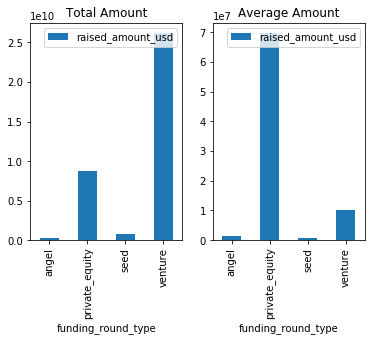

In [543]:
fig,axes =  plt.subplots(1,2)


fraction_part1.plot(kind='bar',x='funding_round_type',y='raised_amount_usd',ax=axes[0],title='Total Amount')

fraction_part.plot(kind='bar',x='funding_round_type',y='raised_amount_usd',ax=axes[1], title='Average Amount')

plt.show()

In [544]:
top3 = top9.loc[top9.country_code.isin(englishSpeakingCountry),:].groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending = False)
top3

country_code
usa   18220406784.00
gbr    1075013504.00
ind     481084512.00
can     419258688.00
irl     276321856.00
Name: raised_amount_usd, dtype: float32

In [545]:
top3.to_frame()

,raised_amount_usd
country_code,
usa,18220406784.00
gbr,1075013504.00
ind,481084512.00
can,419258688.00
irl,276321856.00


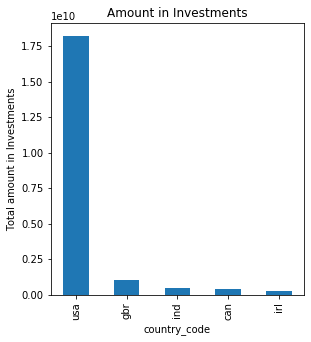

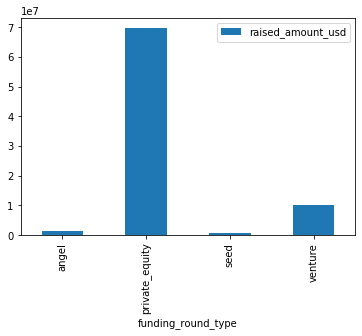

In [546]:
fig, axes = plt.subplots(figsize=(10,5))
y_formatter = mpl.ticker.ScalarFormatter(useOffset=False)
axes.yaxis.set_major_formatter(y_formatter)
plt.subplot(121)
plt.title('Amount in Investments')
plt.xlabel('Countries')
plt.ylabel('Total amount in Investments')
top3.plot(kind='bar',x='country_code',y='raised_amount_usd')


fraction_part.plot(kind='bar',x='funding_round_type',y='raised_amount_usd')

plt.show()


In [547]:
top9_plot = top9.loc[top9.country_code.isin(englishSpeakingCountry),:].groupby(['country_code'])['raised_amount_usd'].sum()
top9_plot

country_code
can     419258688.00
gbr    1075013504.00
ind     481084512.00
irl     276321856.00
usa   18220406784.00
Name: raised_amount_usd, dtype: float32

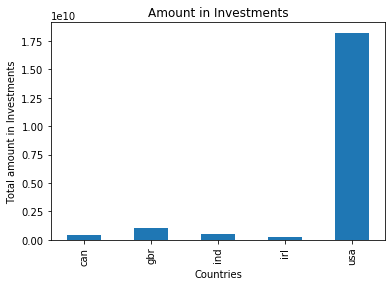

In [548]:
top9_plot.plot(kind='bar',x='country_code',y='raised_amount_usd')
plt.title('Amount in Investments')
plt.xlabel('Countries')
plt.ylabel('Total amount in Investments')
plt.show()

In [549]:
D1_plot = D1.groupby('main_sector')['no_investments'].count().sort_values(ascending = False).head(3)
D1_plot = pd.DataFrame([D1_plot]).transpose()
D1_plot

,no_investments
main_sector,
others,141
cleantech / semiconductors,132
"social, finance, analytics, advertising",102


In [550]:
D2_plot = D2.groupby('main_sector')['no_investments'].count().sort_values(ascending = False).head(3)
D2_plot = pd.DataFrame([D2_plot]).transpose()
D2_plot

,no_investments
main_sector,
others,11
cleantech / semiconductors,11
"social, finance, analytics, advertising",10


In [551]:
D3_plot = D3.groupby('main_sector')['no_investments'].count().sort_values(ascending = False).head(3)
D3_plot = pd.DataFrame([D3_plot]).transpose()
D3_plot

,no_investments
main_sector,
others,6
"social, finance, analytics, advertising",3
entertainment,3


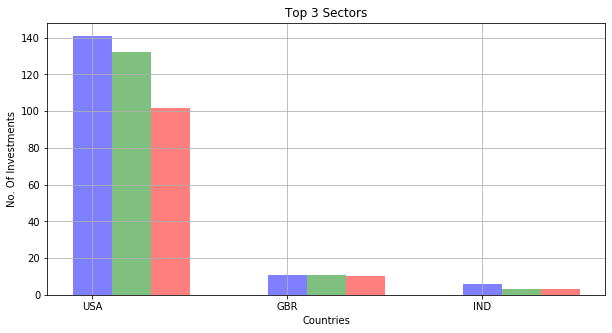

In [552]:
x = list(range(3))
width = 0.20

fig, axes = plt.subplots(figsize=(10,5))
plt.title('Top 3 Sectors')
plt.xlabel('Countries')
plt.ylabel('No. Of Investments')
axes.bar(x, [D1_plot['no_investments'][0], D2_plot['no_investments'][0], D3_plot['no_investments'][0]], width, alpha = 0.5, color='b')
axes.bar( [p + width for p in x], [D1_plot['no_investments'][1], D2_plot['no_investments'][1], D3_plot['no_investments'][1]], width, alpha = 0.5, color='g')
axes.bar( [p + width*2 for p in x], [D1_plot['no_investments'][2], D2_plot['no_investments'][2], D3_plot['no_investments'][2]], width, alpha = 0.5, color='r')

axes.set_xticks(x)
axes.set_xticklabels(['USA', 'GBR', 'IND'])
#plt.legend()
plt.grid()
plt.show()
